In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from datetime import datetime
from selenium.webdriver import Edge, Chrome
import time
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import nltk
from datetime import timedelta


In [2]:
def title_proofing(title,keyword):
    words = nltk.word_tokenize(title)
    tagged = nltk.pos_tag(words)
    grammar = 'NAV: {<NN.?><IN>*<POS>*<CC>*<JJ.?>*<NN.?>*<RB.?>*<VB.?>*}'
    gram_parser = nltk.RegexpParser(grammar)
    chunked = gram_parser.parse(tagged)
    for subtree in chunked.subtrees(lambda chunked: chunked.height() ==2):
        if subtree.label() == 'NAV' and keyword in str(subtree):
            return True
        else:
            return False

    return False

In [5]:
driver = Edge('c:/users/em17/edgedriver_win64/msedgedriver.exe')

articles = {}
articles['title'] = []
articles['link'] = []
articles['week'] = []

subject = 'Trump'

date1 = re.compile('[0-9]{4}/[0-9]{2}/[0-9]{2}')
date2 = re.compile('[0-9]{2}-[0-9]{2}-[0-9]{2}')
date3 = re.compile('[0-9]{4}-[0-9]{2}-[0-9]{2}')


nb_results = 3000
nb_pages = (nb_results//10)+1

for i in range(1,nb_pages+1):
    page = f'https://edition.cnn.com/search?q={subject}*&from={(i-1)*10}&size=10&page={i}&sort=newest&types=all&section='  
    print(page)
    driver.get(page)
    time.sleep(1)
    arts = driver.find_elements_by_class_name("container__headline-text")
    for article in arts:
        title = article.text
        link = article.get_attribute('data-zjs-href')
        if title_proofing(title,subject) == False or 'video' in link:
            continue
        if re.search(date1,link) is not None:
            date = re.search(date1,link).group()
            date = datetime.strptime(date, '%Y/%m/%d')
        elif re.search(date2,link) is not None:
            date = re.search(date2,link).group()
            try:
                date = datetime.strptime(date, '%m-%d-%y')
            except:
                date = datetime.strptime(date, '%y-%m-%d')
        elif re.search(date3,link) is not None:
            date = re.search(date3,link).group()
            date = datetime.strptime(date, '%Y-%m-%d')
        else:
            continue        
        
        if int(datetime.strftime(date,'%w')) != 0:
            delta = int(datetime.strftime(date,'%w'))-1
            week = date - timedelta(days = delta)
        else:
            week = date-timedelta(days = 6)

        articles['title'].append(title)
        articles['link'].append(link)
        articles['week'].append(datetime.strftime(week,'%y/%m/%d'))


driver.quit()


df_articles = pd.DataFrame(articles)

df_articles

https://edition.cnn.com/search?q=Trump*&from=0&size=10&page=1&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=10&size=10&page=2&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=20&size=10&page=3&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=30&size=10&page=4&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=40&size=10&page=5&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=50&size=10&page=6&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=60&size=10&page=7&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=70&size=10&page=8&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=80&size=10&page=9&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=90&size=10&page=10&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=100&size=10&pag

https://edition.cnn.com/search?q=Trump*&from=860&size=10&page=87&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=870&size=10&page=88&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=880&size=10&page=89&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=890&size=10&page=90&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=900&size=10&page=91&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=910&size=10&page=92&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=920&size=10&page=93&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=930&size=10&page=94&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=940&size=10&page=95&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=950&size=10&page=96&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&

https://edition.cnn.com/search?q=Trump*&from=1700&size=10&page=171&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1710&size=10&page=172&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1720&size=10&page=173&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1730&size=10&page=174&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1740&size=10&page=175&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1750&size=10&page=176&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1760&size=10&page=177&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1770&size=10&page=178&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1780&size=10&page=179&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=1790&size=10&page=180&sort=newest&types=all&section=
https://edition.cnn.

https://edition.cnn.com/search?q=Trump*&from=2540&size=10&page=255&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2550&size=10&page=256&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2560&size=10&page=257&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2570&size=10&page=258&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2580&size=10&page=259&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2590&size=10&page=260&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2600&size=10&page=261&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2610&size=10&page=262&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2620&size=10&page=263&sort=newest&types=all&section=
https://edition.cnn.com/search?q=Trump*&from=2630&size=10&page=264&sort=newest&types=all&section=
https://edition.cnn.

,title,link,week
0,Trump in 2020 praised Tim Walz’s handling of G...,https://www.cnn.com/2024/08/07/politics/trump-...,24/08/05
1,How the Trump campaign plans to try to define ...,https://www.cnn.com/2024/08/06/politics/republ...,24/08/05
2,Trump and Vance rally in battleground Georgia ...,https://www.cnn.com/2024/08/03/politics/trump-...,24/07/29
3,Trump says he’ll debate Harris on Fox News or ...,https://www.cnn.com/2024/08/03/politics/kamala...,24/07/29
4,Trump’s political operation says it raised nea...,https://www.cnn.com/2024/08/01/politics/donald...,24/07/29
...,...,...,...
240,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15
241,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15
242,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15
243,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15


In [15]:
df_articles.to_csv('CNN_08_08_245_arts')

In [3]:
df_articles = pd.read_csv('CNN_08_08_245_arts')

In [18]:
def collect_text(url):
    stringified_article = ''
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    paragraphs = soup.find_all('p', attrs = {'class': 'paragraph inline-placeholder vossi-paragraph-primary-core-light'})
    for par in paragraphs:
        stringified_article += par.text
    return stringified_article


In [15]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.tokenize import sent_tokenize,word_tokenize

In [16]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\em17\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [17]:
def chunked_article(article):
    cleaned_article = article.replace('\xa0', ' ').replace('  ', '').replace('\n', ' ')
    double_tokenized = [word_tokenize(sent) for sent in sent_tokenize(cleaned_article)]
    
    limits = []
    running_count = 0
    for i in range(len(double_tokenized)):
        if len(double_tokenized[i])+running_count > 390:
            limits.append(i)
            running_count = len(double_tokenized[i])
        else:
            running_count += len(double_tokenized[i])
    limits.append('')
    chunks = []
    start = 0
    for l in limits:
        chunk = []
        try:
            for i in range(start,l):
                chunk = chunk+double_tokenized[i]
            start = l
            chunks.append(chunk)
        except:
            for i in range(start,len(double_tokenized)):
                chunk = chunk+double_tokenized[i]
            chunks.append(chunk)
    weights = []
    total = 0
    for chunk in chunks:
        weights.append(len(chunk))
        total += len(chunk)
    weights = [i/total for i in weights]
    return chunks,weights
            



In [8]:
scores_dict = {'pos': [], 'neu': [], 'neg': []}

i = 1

for link in df_articles.link:
    print(i)
    neg = []
    neu = []
    pos = []
    
    chunked, chunk_weights = chunked_article(collect_text(link))
    
    for chunk in chunked:
        
        encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
        output = model(**encoded_text)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        neg.append(scores[0])
        neu.append(scores[1])
        pos.append(scores[2])


    scores_dict['pos'].append(np.sum(np.array(pos)*np.array(chunk_weights)))
    scores_dict['neu'].append(np.sum(np.array(neu)*np.array(chunk_weights)))
    scores_dict['neg'].append(np.sum(np.array(neg)*np.array(chunk_weights)))

    i+=1
        
scores_dict

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245


{'pos': [0.1028249063879915,
  0.06553309130888713,
  0.06678487053483624,
  0.08196210052248232,
  0.27370360493659973,
  0.08354858033908684,
  0.1133444540917057,
  0.05405589747317089,
  0.032445287570125055,
  0.0951848431431375,
  0.02912968397140503,
  0.06434771383606945,
  0.2648640893997755,
  0.08547076874619167,
  0.028988655463238307,
  0.06583691978043703,
  0.07476797532230328,
  0.14713988207670858,
  0.15023082417145583,
  0.024209434473110986,
  0.10815183473605254,
  0.08716542282657212,
  0.3104014604137494,
  0.028735940835120155,
  0.0380413992791697,
  0.07879805808408333,
  0.03516005082028345,
  0.07164842099159219,
  0.03574004114187997,
  0.07440577635862919,
  0.026601648007084464,
  0.14253805374597212,
  0.17290967618860106,
  0.1431449629916977,
  0.17940364415703572,
  0.1535412073135376,
  0.2893340289592743,
  0.04707495906476766,
  0.05261110841453043,
  0.3704245062694672,
  0.02953408476645702,
  0.022089507142213027,
  0.023200741557969556,
  0.198

In [9]:
df_articles['pos'] = scores_dict['pos']
df_articles['neu'] = scores_dict['neu']
df_articles['neg'] = scores_dict['neg']

global_score = lambda x: x['pos']-x['neg']
norm_global_score = lambda x: 20*(0.5+(x/2))

df_articles['global'] = df_articles.apply(global_score,axis = 1)
df_articles['global'] = df_articles['global'].apply(norm_global_score)


df_articles

,Unnamed: 0,title,link,week,pos,neu,neg,global
0,0,Trump in 2020 praised Tim Walz’s handling of G...,https://www.cnn.com/2024/08/07/politics/trump-...,24/08/05,0.102825,0.532621,0.364554,7.382709
1,1,How the Trump campaign plans to try to define ...,https://www.cnn.com/2024/08/06/politics/republ...,24/08/05,0.065533,0.604329,0.330138,7.353955
2,2,Trump and Vance rally in battleground Georgia ...,https://www.cnn.com/2024/08/03/politics/trump-...,24/07/29,0.066785,0.571632,0.361583,7.052015
3,3,Trump says he’ll debate Harris on Fox News or ...,https://www.cnn.com/2024/08/03/politics/kamala...,24/07/29,0.081962,0.633192,0.284846,7.971160
4,4,Trump’s political operation says it raised nea...,https://www.cnn.com/2024/08/01/politics/donald...,24/07/29,0.273704,0.700379,0.025917,12.477863
...,...,...,...,...,...,...,...,...
240,240,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15,0.108911,0.492021,0.399069,7.098421
241,241,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15,0.054358,0.485904,0.459737,5.946209
242,242,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15,0.058865,0.512288,0.428847,6.300185
243,243,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15,0.041339,0.456062,0.502600,5.387390


In [10]:
df_articles.to_csv('CNN_08_08_245_arts')

In [19]:
df_articles = pd.read_csv('CNN_08_08_245_arts').iloc[:,2:]

df_articles

,title,link,week,pos,neu,neg,global
0,Trump in 2020 praised Tim Walz’s handling of G...,https://www.cnn.com/2024/08/07/politics/trump-...,24/08/05,0.102825,0.532621,0.364554,7.382709
1,How the Trump campaign plans to try to define ...,https://www.cnn.com/2024/08/06/politics/republ...,24/08/05,0.065533,0.604329,0.330138,7.353955
2,Trump and Vance rally in battleground Georgia ...,https://www.cnn.com/2024/08/03/politics/trump-...,24/07/29,0.066785,0.571632,0.361583,7.052015
3,Trump says he’ll debate Harris on Fox News or ...,https://www.cnn.com/2024/08/03/politics/kamala...,24/07/29,0.081962,0.633192,0.284846,7.971160
4,Trump’s political operation says it raised nea...,https://www.cnn.com/2024/08/01/politics/donald...,24/07/29,0.273704,0.700379,0.025917,12.477863
...,...,...,...,...,...,...,...
240,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15,0.108911,0.492021,0.399069,7.098421
241,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15,0.054358,0.485904,0.459737,5.946209
242,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15,0.058865,0.512288,0.428847,6.300185
243,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15,0.041339,0.456062,0.502600,5.387390


In [7]:
driver = Edge('c:/users/em17/edgedriver_win64/msedgedriver.exe')

articles = {}
articles['title'] = []
articles['link'] = []
articles['week'] = []

subject = 'Trump'

date1 = re.compile('[0-9]{4}/[0-9]{2}/[0-9]{2}')
date2 = re.compile('[0-9]{2}-[0-9]{2}-[0-9]{2}')
date3 = re.compile('[0-9]{4}-[0-9]{2}-[0-9]{2}')




for i in range(1250,2151,10):
    page = f'https://edition.cnn.com/search?q={subject}*&from={i}&size=10&page=1&sort=newest&types=article&section='  
    print(page)
    driver.get(page)
    time.sleep(1)
    arts = driver.find_elements_by_class_name("container__headline-text")
    for article in arts:
        title = article.text
        link = article.get_attribute('data-zjs-href')
        if title_proofing(title,subject) == False or 'video' in link:
            continue
        if re.search(date1,link) is not None:
            date = re.search(date1,link).group()
            date = datetime.strptime(date, '%Y/%m/%d')
        elif re.search(date2,link) is not None:
            date = re.search(date2,link).group()
            try:
                date = datetime.strptime(date, '%m-%d-%y')
            except:
                date = datetime.strptime(date, '%y-%m-%d')
        elif re.search(date3,link) is not None:
            date = re.search(date3,link).group()
            date = datetime.strptime(date, '%Y-%m-%d')
        else:
            continue        
        
        if int(datetime.strftime(date,'%w')) != 0:
            delta = int(datetime.strftime(date,'%w'))-1
            week = date - timedelta(days = delta)
        else:
            week = date-timedelta(days = 6)

        articles['title'].append(title)
        articles['link'].append(link)
        articles['week'].append(datetime.strftime(week,'%y/%m/%d'))


driver.quit()


df_articles = pd.DataFrame(articles)

df_articles.to_csv('CNN_Extraction_26_08_1')

df_articles

https://edition.cnn.com/search?q=Trump*&from=1250&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1260&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1270&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1280&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1290&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1300&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1310&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1320&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1330&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=1340&size=10&page=1&sort=newest&types=article&section=


https://edition.cnn.com/search?q=Trump*&from=2070&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2080&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2090&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2100&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2110&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2120&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2130&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2140&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2150&size=10&page=1&sort=newest&types=article&section=


,title,link,week
0,What to watch in Trump’s hush money trial,https://www.cnn.com/2024/04/15/politics/what-t...,24/04/15
1,Trump’s first criminal trial is a historic and...,https://www.cnn.com/2024/04/14/politics/trump-...,24/04/15
2,Trump seeks to use NY hush money trial to dela...,https://www.cnn.com/2024/04/14/politics/hush-m...,24/04/15
3,Trump hush money case makes history with first...,https://www.cnn.com/2024/04/14/politics/prosec...,24/04/15
4,Trump endorses Dave McCormick for Senate in Pe...,https://www.cnn.com/2024/04/13/politics/trump-...,24/04/08
...,...,...,...
213,These Trump supporters show why the former pre...,https://www.cnn.com/2024/01/24/politics/new-ha...,24/01/22
214,Trump wins New Hampshire Republican primary,https://www.cnn.com/2024/01/23/politics/trump-...,24/01/22
215,Trump makes history again as he powers toward ...,https://www.cnn.com/2024/01/24/politics/trump-...,24/01/22
216,Trump SPAC has tripled since the Iowa caucuses,https://www.cnn.com/2024/01/23/business/trump-...,24/01/22


In [8]:
driver = Edge('c:/users/em17/edgedriver_win64/msedgedriver.exe')

articles = {}
articles['title'] = []
articles['link'] = []
articles['week'] = []

subject = 'Trump'

date1 = re.compile('[0-9]{4}/[0-9]{2}/[0-9]{2}')
date2 = re.compile('[0-9]{2}-[0-9]{2}-[0-9]{2}')
date3 = re.compile('[0-9]{4}-[0-9]{2}-[0-9]{2}')




for i in range(2160,3061,10):
    page = f'https://edition.cnn.com/search?q={subject}*&from={i}&size=10&page=1&sort=newest&types=article&section='  
    print(page)
    driver.get(page)
    time.sleep(1)
    arts = driver.find_elements_by_class_name("container__headline-text")
    for article in arts:
        title = article.text
        link = article.get_attribute('data-zjs-href')
        if title_proofing(title,subject) == False or 'video' in link:
            continue
        if re.search(date1,link) is not None:
            date = re.search(date1,link).group()
            date = datetime.strptime(date, '%Y/%m/%d')
        elif re.search(date2,link) is not None:
            date = re.search(date2,link).group()
            try:
                date = datetime.strptime(date, '%m-%d-%y')
            except:
                date = datetime.strptime(date, '%y-%m-%d')
        elif re.search(date3,link) is not None:
            date = re.search(date3,link).group()
            date = datetime.strptime(date, '%Y-%m-%d')
        else:
            continue        
        
        if int(datetime.strftime(date,'%w')) != 0:
            delta = int(datetime.strftime(date,'%w'))-1
            week = date - timedelta(days = delta)
        else:
            week = date-timedelta(days = 6)

        articles['title'].append(title)
        articles['link'].append(link)
        articles['week'].append(datetime.strftime(week,'%y/%m/%d'))


driver.quit()


df_articles = pd.DataFrame(articles)

df_articles.to_csv('CNN_Extraction_26_08_2')

df_articles

https://edition.cnn.com/search?q=Trump*&from=2160&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2170&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2180&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2190&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2200&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2210&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2220&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2230&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2240&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2250&size=10&page=1&sort=newest&types=article&section=


https://edition.cnn.com/search?q=Trump*&from=2980&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=2990&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3000&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3010&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3020&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3030&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3040&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3050&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3060&size=10&page=1&sort=newest&types=article&section=


,title,link,week
0,Haley questions Trump’s mental fitness after h...,https://www.cnn.com/2024/01/20/politics/nikki-...,24/01/15
1,Trump renews his motion for a mistrial of defa...,https://www.cnn.com/2024/01/19/politics/trump-...,24/01/15
2,Trump is building his power at home while glob...,https://www.cnn.com/2024/01/19/politics/trump-...,24/01/15
3,Trump lawyers warn Supreme Court of ‘chaos and...,https://www.cnn.com/2024/01/18/politics/14th-a...,24/01/15
4,Trump’s New Hampshire strategy – insults and c...,https://www.cnn.com/2024/01/18/politics/trump-...,24/01/15
...,...,...,...
141,Tensions between Trump and RNC spill over into...,https://www.cnn.com/2023/10/23/politics/trump-...,23/10/23
142,Two more Trump co-defendants plead guilty. Wha...,https://www.cnn.com/2023/10/21/politics/trump-...,23/10/16
143,Trump aide Walt Nauta dismisses concerns over ...,https://www.cnn.com/2023/10/20/politics/classi...,23/10/16
144,"Donald Trump fined $5,000 for violating gag or...",https://www.cnn.com/2023/10/20/politics/trump-...,23/10/16


In [9]:
driver = Edge('c:/users/em17/edgedriver_win64/msedgedriver.exe')

articles = {}
articles['title'] = []
articles['link'] = []
articles['week'] = []

subject = 'Trump'

date1 = re.compile('[0-9]{4}/[0-9]{2}/[0-9]{2}')
date2 = re.compile('[0-9]{2}-[0-9]{2}-[0-9]{2}')
date3 = re.compile('[0-9]{4}-[0-9]{2}-[0-9]{2}')




for i in range(3070,4021,10):
    page = f'https://edition.cnn.com/search?q={subject}*&from={i}&size=10&page=1&sort=newest&types=article&section='  
    print(page)
    driver.get(page)
    time.sleep(1)
    arts = driver.find_elements_by_class_name("container__headline-text")
    for article in arts:
        title = article.text
        link = article.get_attribute('data-zjs-href')
        if title_proofing(title,subject) == False or 'video' in link:
            continue
        if re.search(date1,link) is not None:
            date = re.search(date1,link).group()
            date = datetime.strptime(date, '%Y/%m/%d')
        elif re.search(date2,link) is not None:
            date = re.search(date2,link).group()
            try:
                date = datetime.strptime(date, '%m-%d-%y')
            except:
                date = datetime.strptime(date, '%y-%m-%d')
        elif re.search(date3,link) is not None:
            date = re.search(date3,link).group()
            date = datetime.strptime(date, '%Y-%m-%d')
        else:
            continue        
        
        if int(datetime.strftime(date,'%w')) != 0:
            delta = int(datetime.strftime(date,'%w'))-1
            week = date - timedelta(days = delta)
        else:
            week = date-timedelta(days = 6)

        articles['title'].append(title)
        articles['link'].append(link)
        articles['week'].append(datetime.strftime(week,'%y/%m/%d'))


driver.quit()


df_articles = pd.DataFrame(articles)

df_articles.to_csv('CNN_Extraction_26_08_3')

df_articles

https://edition.cnn.com/search?q=Trump*&from=3070&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3080&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3090&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3100&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3110&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3120&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3130&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3140&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3150&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3160&size=10&page=1&sort=newest&types=article&section=


https://edition.cnn.com/search?q=Trump*&from=3890&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3900&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3910&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3920&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3930&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3940&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3950&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3960&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3970&size=10&page=1&sort=newest&types=article&section=
https://edition.cnn.com/search?q=Trump*&from=3980&size=10&page=1&sort=newest&types=article&section=


,title,link,week
0,Trump ‘does not have the right to say and do e...,https://www.cnn.com/2023/10/16/politics/trump-...,23/10/16
1,"Trump gets mug shot money boost, DeSantis spen...",https://www.cnn.com/2023/10/16/politics/third-...,23/10/16
2,Trump Org. execs considered boosting net worth...,https://www.cnn.com/2023/10/13/politics/trump-...,23/10/09
3,Trump’s turn against Israel offers stark remin...,https://www.cnn.com/2023/10/13/politics/donald...,23/10/09
4,Trump loses first of several bids to toss suit...,https://www.cnn.com/2023/10/13/politics/colora...,23/10/09
...,...,...,...
117,Trump DOJ official Jeffrey Clark urges judge t...,https://www.cnn.com/2023/08/17/politics/jeffre...,23/08/14
118,Trump proposes April 2026 trial in federal ele...,https://www.cnn.com/2023/08/17/politics/trump-...,23/08/14
119,Judge in Trump classified docs case cancels te...,https://www.cnn.com/2023/08/17/politics/cannon...,23/08/14
120,How a real Trump supporter unknowingly became ...,https://www.cnn.com/2023/08/17/politics/erica-...,23/08/14


In [3]:
cnn_second_extraction = pd.concat([pd.read_csv('CNN_Extraction_26_08_1'),pd.read_csv('CNN_Extraction_26_08_2'),pd.read_csv('CNN_Extraction_26_08_3')], ignore_index = True).iloc[:,1:]

cnn_second_extraction

,title,link,week
0,What to watch in Trump’s hush money trial,https://www.cnn.com/2024/04/15/politics/what-t...,24/04/15
1,Trump’s first criminal trial is a historic and...,https://www.cnn.com/2024/04/14/politics/trump-...,24/04/15
2,Trump seeks to use NY hush money trial to dela...,https://www.cnn.com/2024/04/14/politics/hush-m...,24/04/15
3,Trump hush money case makes history with first...,https://www.cnn.com/2024/04/14/politics/prosec...,24/04/15
4,Trump endorses Dave McCormick for Senate in Pe...,https://www.cnn.com/2024/04/13/politics/trump-...,24/04/08
...,...,...,...
481,Trump DOJ official Jeffrey Clark urges judge t...,https://www.cnn.com/2023/08/17/politics/jeffre...,23/08/14
482,Trump proposes April 2026 trial in federal ele...,https://www.cnn.com/2023/08/17/politics/trump-...,23/08/14
483,Judge in Trump classified docs case cancels te...,https://www.cnn.com/2023/08/17/politics/cannon...,23/08/14
484,How a real Trump supporter unknowingly became ...,https://www.cnn.com/2023/08/17/politics/erica-...,23/08/14


In [8]:
scores_dict = {'link': [],'pos': [], 'neu': [], 'neg': []}

i = 1

for link in cnn_second_extraction.link[:177]:
    print(i)
    neg = []
    neu = []
    pos = []
    
    try:
    
        chunked, chunk_weights = chunked_article(collect_text(link))

        for chunk in chunked:

            encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
            output = model(**encoded_text)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            neg.append(scores[0])
            neu.append(scores[1])
            pos.append(scores[2])


        scores_dict['link'].append(link)
        scores_dict['pos'].append(np.sum(np.array(pos)*np.array(chunk_weights)))
        scores_dict['neu'].append(np.sum(np.array(neu)*np.array(chunk_weights)))
        scores_dict['neg'].append(np.sum(np.array(neg)*np.array(chunk_weights)))
        
        i+=1
        
    except:
        i+=1
        continue

        
scores_dict

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177


{'link': ['https://www.cnn.com/2024/04/15/politics/what-to-watch-trump-hush-money-trial/index.html',
  'https://www.cnn.com/2024/04/14/politics/trump-first-criminal-trial-analysis/index.html',
  'https://www.cnn.com/2024/04/14/politics/hush-money-trial-trump/index.html',
  'https://www.cnn.com/2024/04/14/politics/prosecutors-trump-trial-new-york/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-dave-mccormick-senate-pennsylvania/index.html',
  'https://www.cnn.com/2024/04/13/politics/pennsylvania-election-trump-mccormick/index.html',
  'https://www.cnn.com/2024/04/13/politics/presidential-race-near-even-split-biden-trump/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-rhetoric/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-trial-schedule/index.html',
  'https://www.cnn.com/2024/04/12/politics/mike-johnson-trump-mar-a-lago/index.html',
  'https://www.cnn.com/2024/04/12/business/trump-media-stock-truth-social/index.html',
  'https://www.cnn.com/20

In [9]:
i = 1

for link in cnn_second_extraction.link[177:345]:
    print(i)
    neg = []
    neu = []
    pos = []
    
    try:
    
        chunked, chunk_weights = chunked_article(collect_text(link))

        for chunk in chunked:

            encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
            output = model(**encoded_text)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            neg.append(scores[0])
            neu.append(scores[1])
            pos.append(scores[2])


        scores_dict['link'].append(link)
        scores_dict['pos'].append(np.sum(np.array(pos)*np.array(chunk_weights)))
        scores_dict['neu'].append(np.sum(np.array(neu)*np.array(chunk_weights)))
        scores_dict['neg'].append(np.sum(np.array(neg)*np.array(chunk_weights)))
        
        i+=1
        
    except:
        i+=1
        continue

        
scores_dict

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


{'link': ['https://www.cnn.com/2024/04/15/politics/what-to-watch-trump-hush-money-trial/index.html',
  'https://www.cnn.com/2024/04/14/politics/trump-first-criminal-trial-analysis/index.html',
  'https://www.cnn.com/2024/04/14/politics/hush-money-trial-trump/index.html',
  'https://www.cnn.com/2024/04/14/politics/prosecutors-trump-trial-new-york/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-dave-mccormick-senate-pennsylvania/index.html',
  'https://www.cnn.com/2024/04/13/politics/pennsylvania-election-trump-mccormick/index.html',
  'https://www.cnn.com/2024/04/13/politics/presidential-race-near-even-split-biden-trump/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-rhetoric/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-trial-schedule/index.html',
  'https://www.cnn.com/2024/04/12/politics/mike-johnson-trump-mar-a-lago/index.html',
  'https://www.cnn.com/2024/04/12/business/trump-media-stock-truth-social/index.html',
  'https://www.cnn.com/20

In [10]:
i = 1

for link in cnn_second_extraction.link[345:]:
    print(i)
    neg = []
    neu = []
    pos = []
    
    try:
    
        chunked, chunk_weights = chunked_article(collect_text(link))

        for chunk in chunked:

            encoded_text = tokenizer(' '.join(chunk), return_tensors='pt')
            output = model(**encoded_text)
            scores = output[0][0].detach().numpy()
            scores = softmax(scores)
            neg.append(scores[0])
            neu.append(scores[1])
            pos.append(scores[2])


        scores_dict['link'].append(link)
        scores_dict['pos'].append(np.sum(np.array(pos)*np.array(chunk_weights)))
        scores_dict['neu'].append(np.sum(np.array(neu)*np.array(chunk_weights)))
        scores_dict['neg'].append(np.sum(np.array(neg)*np.array(chunk_weights)))
        
        i+=1
        
    except:
        i+=1
        continue

        
scores_dict

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141


{'link': ['https://www.cnn.com/2024/04/15/politics/what-to-watch-trump-hush-money-trial/index.html',
  'https://www.cnn.com/2024/04/14/politics/trump-first-criminal-trial-analysis/index.html',
  'https://www.cnn.com/2024/04/14/politics/hush-money-trial-trump/index.html',
  'https://www.cnn.com/2024/04/14/politics/prosecutors-trump-trial-new-york/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-dave-mccormick-senate-pennsylvania/index.html',
  'https://www.cnn.com/2024/04/13/politics/pennsylvania-election-trump-mccormick/index.html',
  'https://www.cnn.com/2024/04/13/politics/presidential-race-near-even-split-biden-trump/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-rhetoric/index.html',
  'https://www.cnn.com/2024/04/13/politics/trump-trial-schedule/index.html',
  'https://www.cnn.com/2024/04/12/politics/mike-johnson-trump-mar-a-lago/index.html',
  'https://www.cnn.com/2024/04/12/business/trump-media-stock-truth-social/index.html',
  'https://www.cnn.com/20

In [21]:
scores_second_extraction = pd.DataFrame(scores_dict)



scores_second_extraction

scores_second_extraction.to_csv('CNN_Scores_26_08')

In [5]:
scores_second_extraction = pd.read_csv('CNN_Scores_26_08').iloc[:,1:]


scores_second_extraction

,link,pos,neu,neg
0,https://www.cnn.com/2024/04/15/politics/what-t...,0.028316,0.539239,0.432444
1,https://www.cnn.com/2024/04/14/politics/trump-...,0.035388,0.382441,0.582171
2,https://www.cnn.com/2024/04/14/politics/hush-m...,0.036726,0.530718,0.432556
3,https://www.cnn.com/2024/04/14/politics/prosec...,0.039953,0.600239,0.359809
4,https://www.cnn.com/2024/04/13/politics/trump-...,0.225178,0.542254,0.232568
...,...,...,...,...
480,https://www.cnn.com/2023/08/17/politics/jeffre...,0.023651,0.535001,0.441348
481,https://www.cnn.com/2023/08/17/politics/trump-...,0.039367,0.578646,0.381987
482,https://www.cnn.com/2023/08/17/politics/cannon...,0.034964,0.571081,0.393955
483,https://www.cnn.com/2023/08/17/politics/erica-...,0.039116,0.403905,0.556979


In [27]:
cnn_second_extraction_final = pd.merge(cnn_second_extraction, scores_second_extraction, on = 'link')

cnn_second_extraction_final.drop_duplicates(inplace = True, ignore_index=True)

global_score = lambda x: x['pos']-x['neg']
norm_global_score = lambda x: 20*(0.5+(x/2))

cnn_second_extraction_final['global'] = cnn_second_extraction_final.apply(global_score,axis = 1)
cnn_second_extraction_final['global'] = cnn_second_extraction_final['global'].apply(norm_global_score)

cnn_second_extraction_final

,title,link,week,pos,neu,neg,global
0,What to watch in Trump’s hush money trial,https://www.cnn.com/2024/04/15/politics/what-t...,24/04/15,0.028316,0.539239,0.432444,5.958723
1,Trump’s first criminal trial is a historic and...,https://www.cnn.com/2024/04/14/politics/trump-...,24/04/15,0.035388,0.382441,0.582171,4.532171
2,Trump seeks to use NY hush money trial to dela...,https://www.cnn.com/2024/04/14/politics/hush-m...,24/04/15,0.036726,0.530718,0.432556,6.041707
3,Trump hush money case makes history with first...,https://www.cnn.com/2024/04/14/politics/prosec...,24/04/15,0.039953,0.600239,0.359809,6.801437
4,Trump endorses Dave McCormick for Senate in Pe...,https://www.cnn.com/2024/04/13/politics/trump-...,24/04/08,0.225178,0.542254,0.232568,9.926108
...,...,...,...,...,...,...,...
475,Trump DOJ official Jeffrey Clark urges judge t...,https://www.cnn.com/2023/08/17/politics/jeffre...,23/08/14,0.023651,0.535001,0.441348,5.823039
476,Trump proposes April 2026 trial in federal ele...,https://www.cnn.com/2023/08/17/politics/trump-...,23/08/14,0.039367,0.578646,0.381987,6.573799
477,Judge in Trump classified docs case cancels te...,https://www.cnn.com/2023/08/17/politics/cannon...,23/08/14,0.034964,0.571081,0.393955,6.410093
478,How a real Trump supporter unknowingly became ...,https://www.cnn.com/2023/08/17/politics/erica-...,23/08/14,0.039116,0.403905,0.556979,4.821371


In [28]:
cnn_second_extraction_final.to_csv('CNN_Extraction_26_08_final')

In [34]:
cnn_extraction_full = pd.concat([cnn_second_extraction_final, pd.read_csv('CNN_08_08_245_arts').iloc[:,2:]],ignore_index = True)

cnn_extraction_full

,title,link,week,pos,neu,neg,global
0,What to watch in Trump’s hush money trial,https://www.cnn.com/2024/04/15/politics/what-t...,24/04/15,0.028316,0.539239,0.432444,5.958723
1,Trump’s first criminal trial is a historic and...,https://www.cnn.com/2024/04/14/politics/trump-...,24/04/15,0.035388,0.382441,0.582171,4.532171
2,Trump seeks to use NY hush money trial to dela...,https://www.cnn.com/2024/04/14/politics/hush-m...,24/04/15,0.036726,0.530718,0.432556,6.041707
3,Trump hush money case makes history with first...,https://www.cnn.com/2024/04/14/politics/prosec...,24/04/15,0.039953,0.600239,0.359809,6.801437
4,Trump endorses Dave McCormick for Senate in Pe...,https://www.cnn.com/2024/04/13/politics/trump-...,24/04/08,0.225178,0.542254,0.232568,9.926108
...,...,...,...,...,...,...,...
720,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15,0.108911,0.492021,0.399069,7.098421
721,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15,0.054358,0.485904,0.459737,5.946209
722,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15,0.058865,0.512288,0.428847,6.300185
723,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15,0.041339,0.456062,0.502600,5.387390


In [35]:
cnn_extraction_full.to_csv('CNN_Extraction_08_24_full')

In [2]:
cnn_extraction_full = pd.read_csv('CNN_Extraction_08_24_full', index_col = 0)

cnn_extraction_full

,title,link,week,pos,neu,neg,global
0,What to watch in Trump’s hush money trial,https://www.cnn.com/2024/04/15/politics/what-t...,24/04/15,0.028316,0.539239,0.432444,5.958723
1,Trump’s first criminal trial is a historic and...,https://www.cnn.com/2024/04/14/politics/trump-...,24/04/08,0.035388,0.382441,0.582171,4.532171
2,Trump seeks to use NY hush money trial to dela...,https://www.cnn.com/2024/04/14/politics/hush-m...,24/04/08,0.036726,0.530718,0.432556,6.041707
3,Trump hush money case makes history with first...,https://www.cnn.com/2024/04/14/politics/prosec...,24/04/08,0.039953,0.600239,0.359809,6.801437
4,Trump endorses Dave McCormick for Senate in Pe...,https://www.cnn.com/2024/04/13/politics/trump-...,24/04/08,0.225178,0.542254,0.232568,9.926108
...,...,...,...,...,...,...,...
720,New Trump super PAC ad hammers Biden on immigr...,https://www.cnn.com/2024/04/17/politics/trump-...,24/04/15,0.108911,0.492021,0.399069,7.098421
721,"Trump targets Alvin Bragg, the prosecutor in h...",https://www.cnn.com/2024/04/16/politics/trump-...,24/04/15,0.054358,0.485904,0.459737,5.946209
722,Did Donald Trump fall asleep in court? Why the...,https://www.cnn.com/2024/04/16/media/donald-tr...,24/04/15,0.058865,0.512288,0.428847,6.300185
723,Trump has an unusual request on trial Day 1,https://www.cnn.com/2024/04/15/politics/trump-...,24/04/15,0.041339,0.456062,0.502600,5.387390


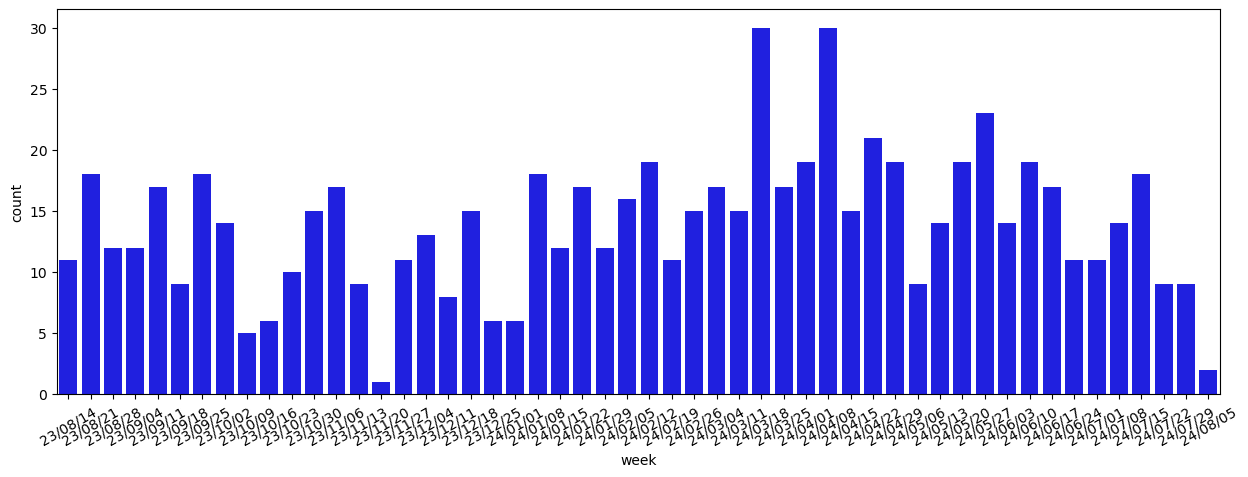

In [32]:
plt.figure(figsize= (15,5))
sns.countplot(x = 'week', data = cnn_extraction_full, order = sorted(cnn_extraction_full.week.unique()),color='blue')
plt.xticks(rotation=30, size =10) 
plt.show()

In [3]:
cnn_extraction_full_agg = cnn_extraction_full.iloc[:,2:].groupby('week').mean()

cnn_extraction_full_agg

,pos,neu,neg,global
week,,,,
23/08/14,0.048037,0.576339,0.375624,6.724135
23/08/21,0.083794,0.594149,0.322057,7.617365
23/08/28,0.054091,0.585407,0.360502,6.935891
23/09/04,0.107340,0.560698,0.331963,7.753773
23/09/11,0.068735,0.565232,0.366032,7.027028
23/09/18,0.080142,0.543466,0.376393,7.037487
23/09/25,0.072030,0.560146,0.367824,7.042057
23/10/02,0.083095,0.527077,0.389829,6.932656
23/10/09,0.055616,0.513440,0.430943,6.246733


In [6]:
# function to add context to the score evolution
def add_context_info(x, y, info,alignment = 'left'):
        plt.text(x, y, info, fontsize = 6, ha = alignment, weight = 'bold', color = 'red')

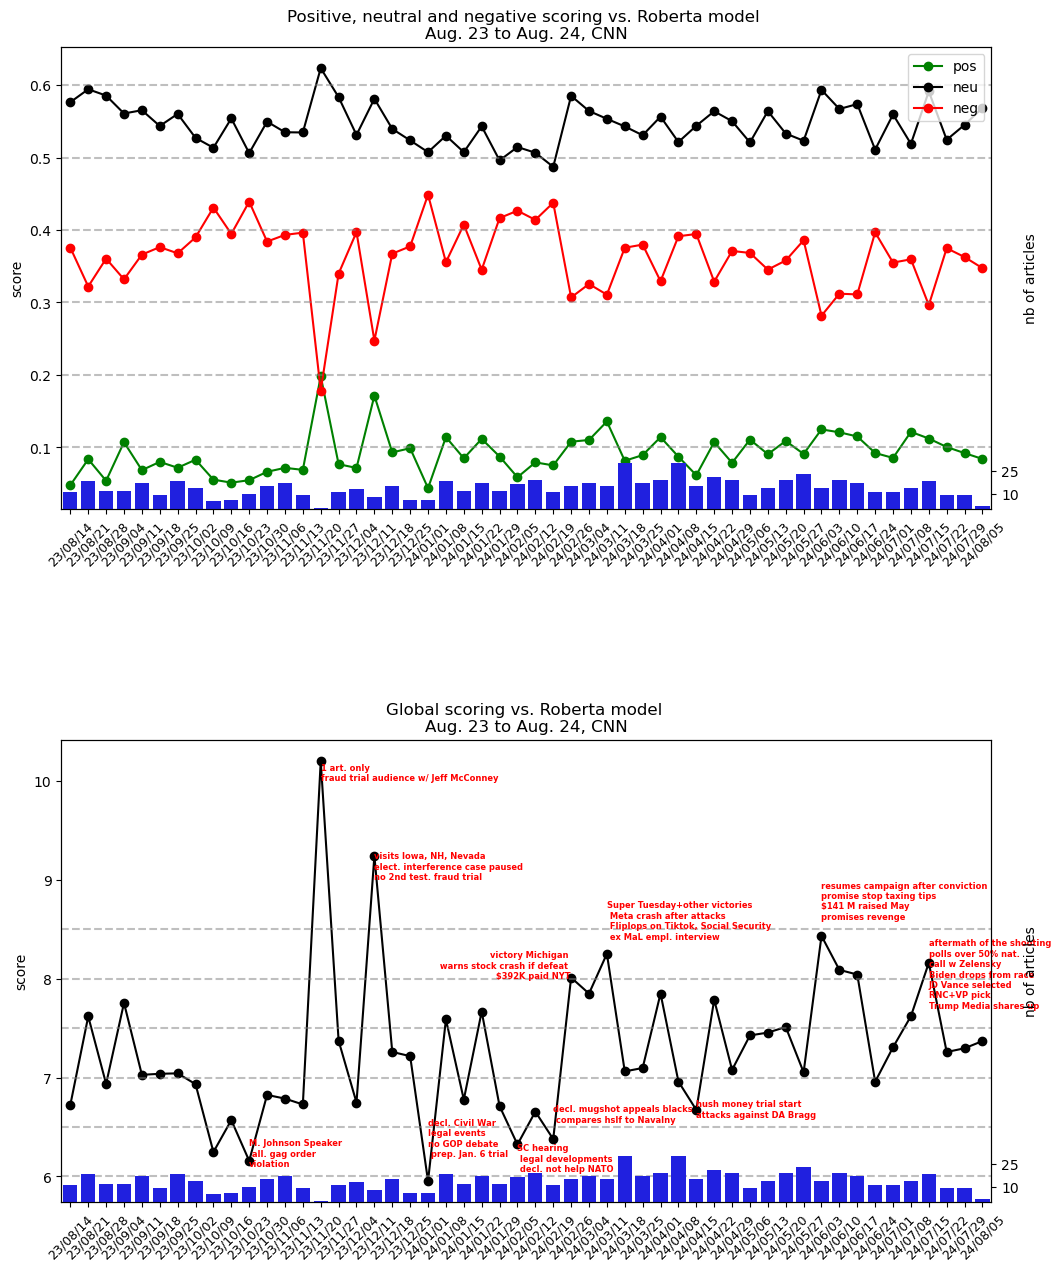

In [12]:
plt.figure(figsize = (12,15))
plt.subplot(2,1,1)
plt.plot(cnn_extraction_full_agg.index,cnn_extraction_full_agg.pos, color = 'green',marker = 'o')
plt.plot(cnn_extraction_full_agg.index,cnn_extraction_full_agg.neu, color = 'black',marker = 'o')
plt.plot(cnn_extraction_full_agg.index,cnn_extraction_full_agg.neg, color = 'red',marker = 'o')
plt.ylabel('score')
plt.title('Positive, neutral and negative scoring vs. Roberta model \nAug. 23 to Aug. 24, CNN')
plt.legend(['pos', 'neu', 'neg'], loc = 'upper right')
plt.xticks(rotation = 45, size = 9)
for i in range(1,7):
    plt.axhline(i/10, alpha = 0.5, linestyle = '--', c = 'grey')
sec_x1 = plt.twinx()
sns.countplot(x = 'week', data = cnn_extraction_full, order = sorted(cnn_extraction_full.week.unique()),color='blue')
sec_x1.set_ylim(top = 300)
sec_x1.set_yticks([10,25])
sec_x1.set_ylabel('nb of articles')
plt.subplot(2,1,2)
plt.plot(cnn_extraction_full_agg.index,cnn_extraction_full_agg['global'],color = 'black',marker = 'o')
plt.ylabel('score')
plt.title('Global scoring vs. Roberta model \nAug. 23 to Aug. 24, CNN')
plt.xticks(rotation = 45, size = 9)
for i in range(60,90,5):
    plt.axhline(i/10, alpha = 0.5, linestyle = '--', c = 'grey')
add_context_info('23/11/20', 10, '1 art. only \nfraud trial audience w/ Jeff McConney', alignment = 'left')
add_context_info('23/10/23', 6.1, 'M. Johnson Speaker \n all. gag order \nviolation')
add_context_info('23/12/11', 9, 'visits Iowa, NH, Nevada \nelect. interference case paused \nno 2nd test. fraud trial')
add_context_info('24/01/01', 6.2, 'decl. Civil War \nlegal events \nno GOP debate \n prep. Jan. 6 trial')
add_context_info('24/02/05', 6.05, 'SC hearing \n legal developments \n decl. not help NATO')
add_context_info('24/02/19', 6.55, 'decl. mugshot appeals blacks \n compares hslf to Navalny')
add_context_info('24/02/26', 8, 'victory Michigan \n warns stock crash if defeat \n $392K paid NYT', alignment = 'right')
add_context_info('24/03/11', 8.4, 'Super Tuesday+other victories \n Meta crash after attacks \n Fliplops on Tiktok, Social Security \n ex MaL empl. interview')
add_context_info('24/04/15', 6.6, 'hush money trial start \nattacks against DA Bragg')
add_context_info('24/06/03', 8.6, 'resumes campaign after conviction \npromise stop taxing tips \n$141 M raised May \npromises revenge')
add_context_info('24/07/15', 7.7, 'aftermath of the shooting \npolls over 50% nat. \ncall w Zelensky \nBiden drops from race \nJD Vance selected \nRNC+VP pick \nTrump Media shares up')
sec_x2 = plt.twinx()
sns.countplot(x = 'week', data = cnn_extraction_full, order = sorted(cnn_extraction_full.week.unique()),color='blue')
sec_x2.set_ylim(top = 300)
sec_x2.set_yticks([10,25])
sec_x2.set_ylabel('nb of articles')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('CNN Score over 1 Year aug. 23-aug.24.png')
plt.show()


In [10]:
week = '24/07/15'

titles = list(cnn_extraction_full[(cnn_extraction_full["week"] == week)].title)
links = list(cnn_extraction_full[cnn_extraction_full["week"] == week].link)
grades = list(cnn_extraction_full[cnn_extraction_full["week"] == week]['global'])

for i in range(len(titles)):  
    print(titles[i])
    print(links[i])
    print(grades[i])


Trump’s team is already on the attack against Harris
https://www.cnn.com/2024/07/21/politics/trump-team-kamala-harris-attacks/index.html
8.347468953781394
Trump’s epic week began with cheating death
https://www.cnn.com/2024/07/20/politics/for-trump-an-incredible-week-since-escaping-death/index.html
7.0692801938575
Trump says he had ‘a very good phone call’ with Zelensky, discussed Russia-Ukraine war
https://www.cnn.com/2024/07/19/politics/donald-trump-zelensky-phone-call-2024/index.html
10.5492501357427
Trump’s would-be assassin researched previous mass shooter Ethan Crumbley and his family before attack
https://www.cnn.com/2024/07/19/politics/trump-rally-shooter-searches/index.html
6.184027556484985
Trump’s team wasn’t told about reports of suspicious person before rally shooting, sources say
https://www.cnn.com/2024/07/18/politics/trump-shooting-rally-security-invs/index.html
6.115911959838893
Trump triumphant as Biden descends into a deepening crisis
https://www.cnn.com/2024/07/18/p